<a href="https://colab.research.google.com/github/cidcom/SatelliteCloudGenerator/blob/main/01c_Usage_Examples_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/cidcom/SatelliteCloudGenerator/blob/main/01c_Usage_Examples_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Usage of SatelliteCloudGenerator
☁️ The following are example use cases of the [SatelliteCloudGenerator tool](https://github.com/cidcom/SatelliteCloudGenerator).

The interface is largely based in PyTorch and can be readily applied in other PyTorch projects. 🔥

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports and installs...
Please note the `--recurse-submodules` setting of `git clone` which is necessary to clone the internal submodule for [LocalGaussianBlur](https://github.com/mikonvergence/LocalGaussianBlur).



In [2]:
! git clone --recurse-submodules https://github.com/cidcom/SatelliteCloudGenerator.git

Cloning into 'SatelliteCloudGenerator'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 165 (delta 84), reused 101 (delta 37), pack-reused 0
Receiving objects: 100% (165/165), 12.12 MiB | 26.24 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [3]:
!pip install -q torch==1.10.0 torchvision numpy imageio kornia

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:40tcmalloc: large alloc 1147494400 bytes == 0x65218000 @  0x7faa2b392615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 881.9 MB 21 kB/s 
     |████████████████████████████████| 551 kB 84.3 MB/s 
     |████████████████████████████████| 24.3 MB 1.1 MB/s 
     |████████████████████████████████| 19.1 MB 969 kB/s 
     |████████████████████████████████| 19.1 MB 307 kB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 88.0 MB/s 
ERROR: pip's dependency resolver does not currently take into accou

In [4]:
import sys
sys.path.append('./SatelliteCloudGenerator/')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from src import *
import imageio

plt.rcParams["figure.figsize"] = (20,10)

rgb_img = imageio.imread('./SatelliteCloudGenerator/imgs/rgb_example.png')[...,:3]/255

## New Feature: Shadows

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

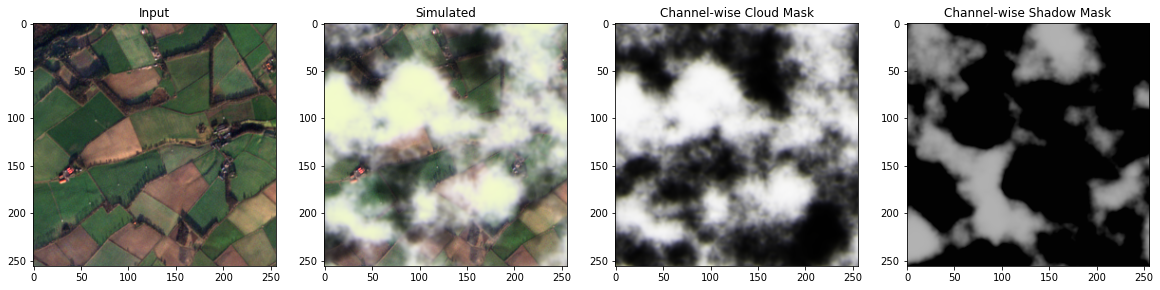

In [5]:
cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                        return_cloud=True
                                       )

plt.subplot(1,4,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,4,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,4,3)
plt.imshow(cmask)
plt.title('Channel-wise Cloud Mask')
plt.subplot(1,4,4)
plt.imshow(smask)
plt.title('Channel-wise Shadow Mask')

### Shadow-only

Text(0.5, 1.0, 'Channel-wise Shadow Mask')

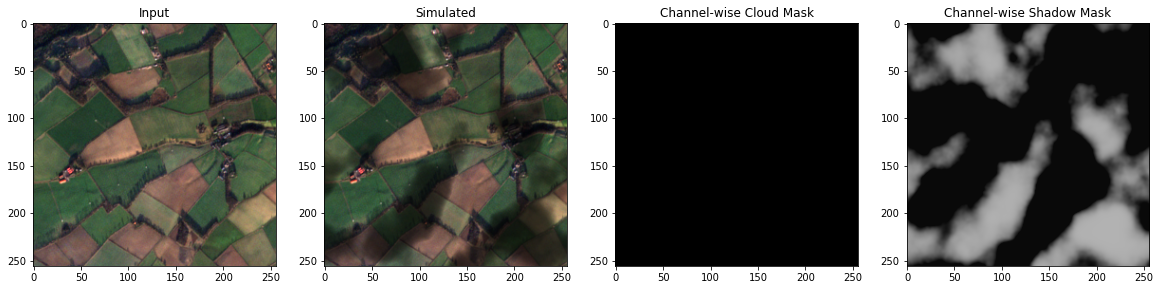

In [6]:
cl, cmask, smask = add_cloud_and_shadow(rgb_img,
                                        max_lvl=0.0,
                                        min_lvl=0.0,
                                        decay_factor=0.5,
                                        return_cloud=True
                                       )

plt.subplot(1,4,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,4,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,4,3)
plt.imshow(cmask)
plt.title('Channel-wise Cloud Mask')
plt.subplot(1,4,4)
plt.imshow(smask)
plt.title('Channel-wise Shadow Mask')

## Cloud Types: Thick Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

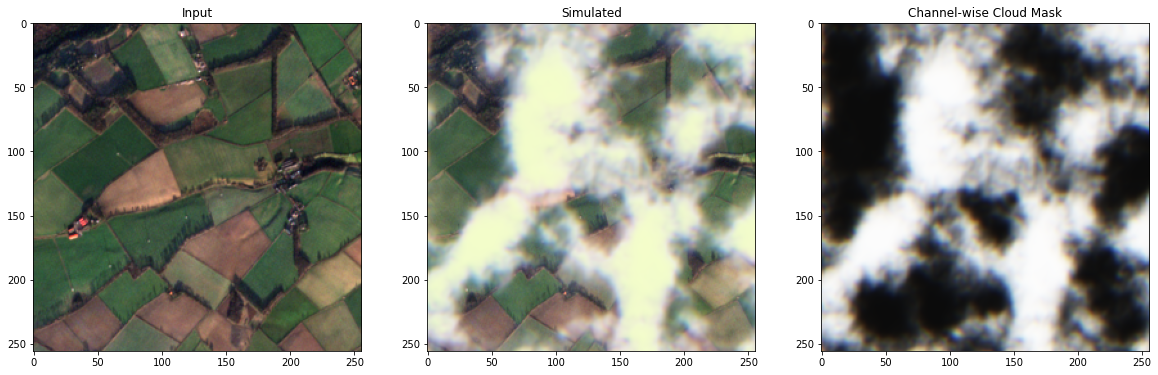

In [7]:
cl, mask = add_cloud(rgb_img,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thick Foggy Cloud

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

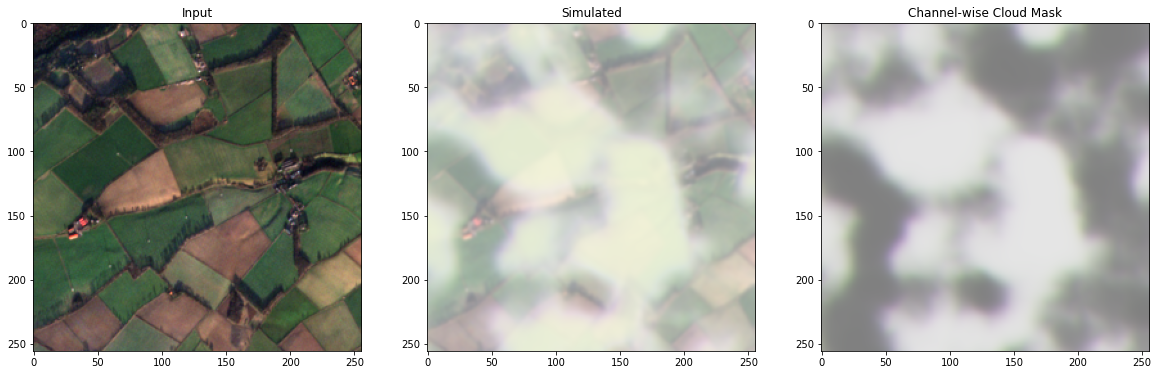

In [8]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.5,
                     max_lvl=0.9,
                     decay_factor=1.85,
                     return_cloud=True)

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

# Cloud Types: Thin Fog

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

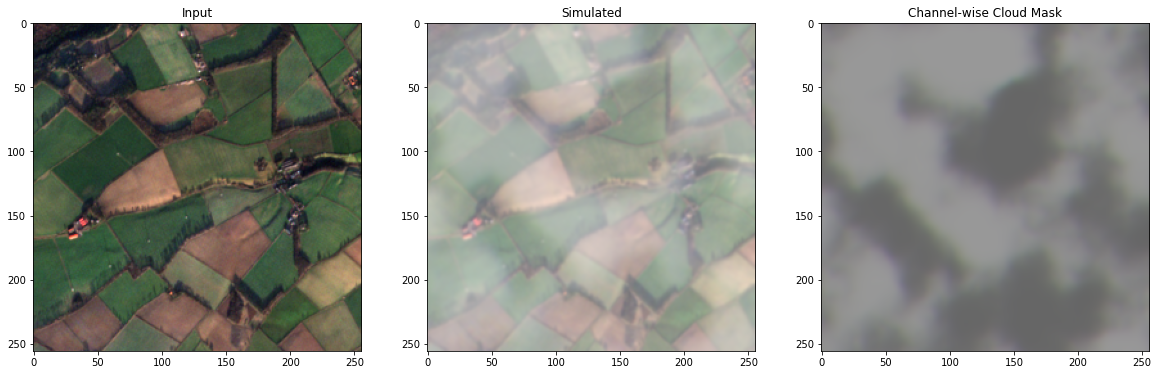

In [9]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.4,
                     max_lvl=0.6,
                     decay_factor=1.5,
                     return_cloud=True)

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## Inverted Cloud Example
For some sensors, like IR, the clouds may actually decrease the level of reflected power, meaning that cloud regions can appear darker. For those cases, `invert=True` argument can be used to invert the cloud as shown below.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

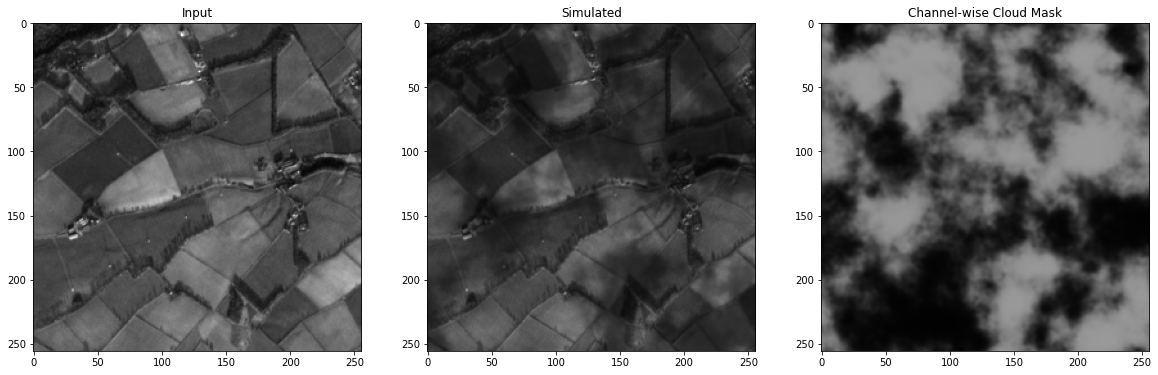

In [14]:
gray_img=rgb_img.mean(-1)

cl, mask = add_cloud(gray_img,
                     max_lvl = 0.6,                    
                     invert=True,
                     blur_scaling=1.0,
                     return_cloud=True
                    )
plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl.squeeze(),vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask.squeeze(),vmin=0.0,vmax=1.0, cmap='gray')
plt.title('Channel-wise Cloud Mask')

# Parameter Ablations
## 1. Basic Cloud

A basic cloud with `max_lvl` of ground component (`1.0` guarantees some clear pixels) and `min_lvl` that controles the maximum value of cloud strength (`1.0` guarantees some pixels with non-transparent cloud).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

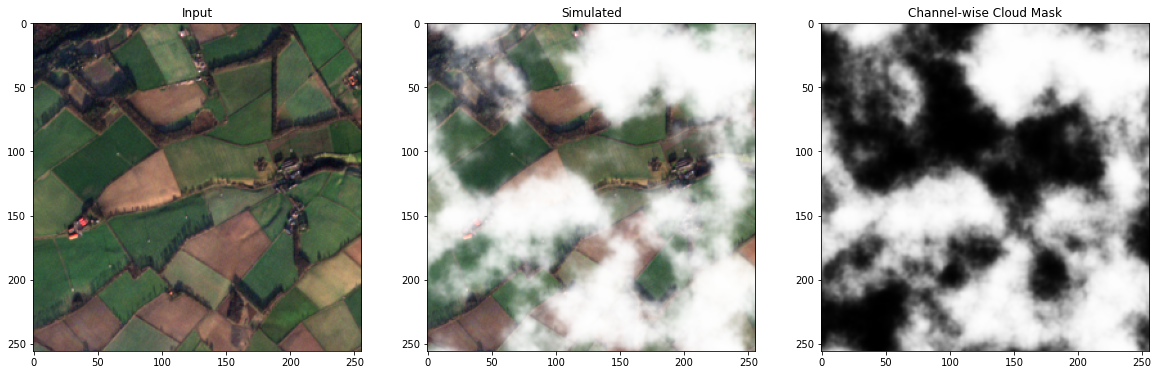

In [15]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 2. Cloud Color

The color of the cloud component (white by default) can be adjusted with the average color from the clear underlying image by setting `cloud_color` to `True`.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

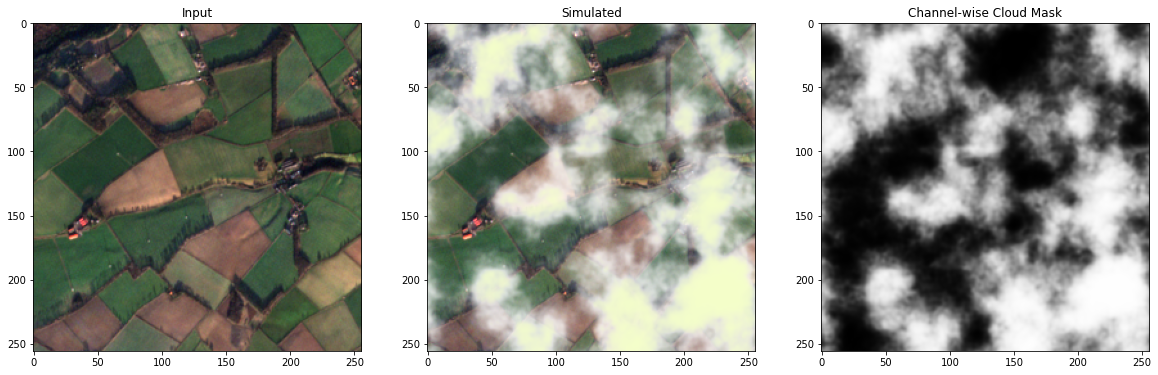

In [16]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=True,
                     channel_offset=0,
                     blur_scaling=0,
                     return_cloud=True
                    )
plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 3. Channel Offset

The `channel_offset` setting controls the maximum positional offset in `x` or `y` direction between the channel-specific cloud masks and the base cloud mask (The value is sampled uniformly from the range `[-channel_offset,+channel_offset]`).

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

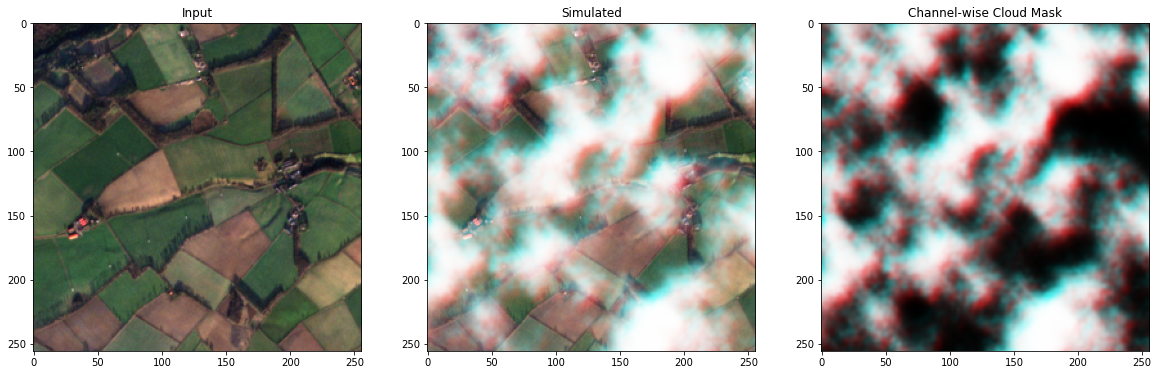

In [17]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=1.0,
                     cloud_color=False,
                     channel_offset=3,
                     blur_scaling=0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')

## 4. Blur Under Cloud

By setting blur_scaling argument to a value different than `0.0`, a locally varying Gaussian blur can be applied. The standard deviation is proportional to the cloud strength (ranging between `0` and `1`) multplied by the `blur_scaling`

 factor.

Text(0.5, 1.0, 'Channel-wise Cloud Mask')

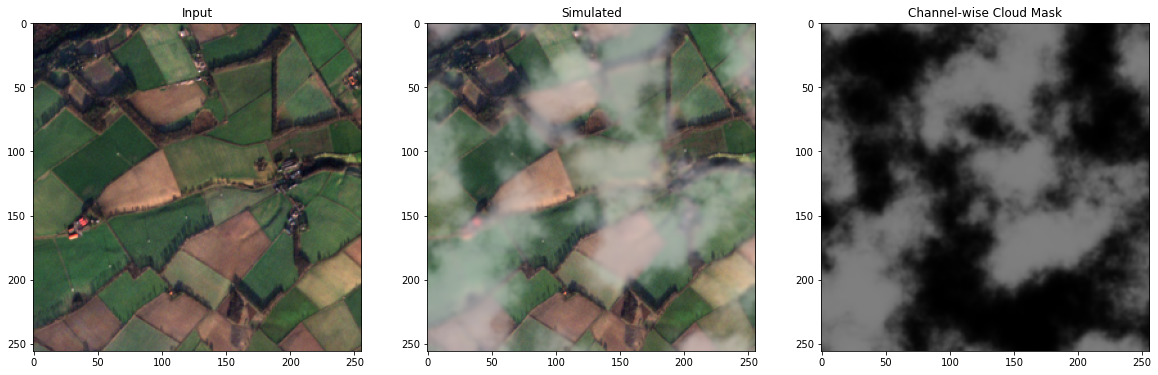

In [18]:
cl, mask = add_cloud(rgb_img,
                     min_lvl=0.0,
                     max_lvl=0.5,
                     cloud_color=False,
                     channel_offset=0,
                     blur_scaling=4.0,
                     return_cloud=True
                    )

plt.subplot(1,3,1)
plt.imshow(rgb_img)
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(cl)
plt.title('Simulated')
plt.subplot(1,3,3)
plt.imshow(mask)
plt.title('Channel-wise Cloud Mask')